In [1]:
from king22.clean import Clean2022
from king23.clean import Clean2023
from king24.clean import Clean2024

Cleaner2022 = Clean2022()
dels_2022 = Cleaner2022.clean_del()
advs_2022 = Cleaner2022.clean_adv()

Cleaner2023 = Clean2023()
dels_2023 = Cleaner2023.clean_del()
advs_2023 = Cleaner2023.clean_adv()

Cleaner2024 = Clean2024()
dels_2024 = Cleaner2024.clean_del()
advs_2024 = Cleaner2024.clean_adv()

schools1 = advs_2022['School'].unique()
schools2 = advs_2023['School'].unique()
schools3 = advs_2024['School'].unique()

set1 = set(schools1)
set2 = set(schools2)
set3 = set(schools3)


                                    School  Num. of Dels
0                    Inglemoor High School            26
1                    Interlake High School            21
2                     Eastlake High School             8
3            Bellarmine Preparatory School             7
4                 Centennial Middle School             1
5                      Juanita High School             8
6                          Seattle Academy            13
7                  Evergreen Middle School             8
8              Lake Washington High School             7
9   The Downtown School: A Lakeside School             5
10                   Roosevelt High School             9
11            Henry M. Jackson High School             1
12                 North Creek High School             2
13                    Annie Wright Schools             5
14                     Redmond High School             2
15                  Shorecrest High School             4
16              Willows Prepara

In [2]:
advs_2024

,School,Num. of Dels
0,Eastlake High School,16
1,Odle Middle School,5
2,Children's Institute For Learning Differences,1
3,Inglemoor High School,7
4,Mount Si High School,19
5,Henry M. Jackson High School,5
6,Skyline High School,1
7,Tesla STEM High School,3
8,Liberty High School,9
9,Evergreen Middle School,8


In [3]:
common_schools = set1 & set2 & set3

In [4]:
# Filter datasets to include only schools present in all datasets
df1_common = advs_2022[advs_2022['School'].isin(common_schools)]
df2_common = advs_2023[advs_2023['School'].isin(common_schools)]
df3_common = advs_2024[advs_2024['School'].isin(common_schools)]

df1_common, df2_common, df3_common

(                            School  Num. of Dels
 0            Inglemoor High School            26
 1            Interlake High School            21
 2             Eastlake High School             8
 3    Bellarmine Preparatory School             7
 6                  Seattle Academy            13
 7          Evergreen Middle School             8
 8      Lake Washington High School             7
 10           Roosevelt High School             9
 11    Henry M. Jackson High School             1
 12         North Creek High School             2
 14             Redmond High School             2
 15          Shorecrest High School             4
 17             Liberty High School             6
 18                 Lakeside School            12
 20             Hanford High School             1
 21  International Community School             6
 22               The Center School             1
 23         Woodinville High School            10
 24            Bellevue High School             6


In [5]:
df_merged = df1_common.merge(df2_common, on='School', suffixes=(' 2022', ' 2023'))
df_merged = df_merged.merge(df3_common, on='School')
df_merged.rename(columns={'Num. of Dels': 'Num. of Dels 2024'}, inplace=True)

print(df_merged)

                            School  Num. of Dels 2022  Num. of Dels 2023  \
0            Inglemoor High School                 26                 12   
1            Interlake High School                 21                 23   
2             Eastlake High School                  8                 16   
3    Bellarmine Preparatory School                  7                 27   
4                  Seattle Academy                 13                  3   
5          Evergreen Middle School                  8                  1   
6      Lake Washington High School                  7                  7   
7            Roosevelt High School                  9                  4   
8     Henry M. Jackson High School                  1                  9   
9          North Creek High School                  2                  2   
10             Redmond High School                  2                  3   
11          Shorecrest High School                  4                  5   
12          

In [6]:
# Calculate changes in participation
df_merged['change_year1_to_year2'] = df_merged['Num. of Dels 2023'] - df_merged['Num. of Dels 2022']
df_merged['change_year2_to_year3'] = df_merged['Num. of Dels 2024'] - df_merged['Num. of Dels 2023']

# Calculate percentage changes if needed
df_merged['percent_change_year1_to_year2'] = (df_merged['change_year1_to_year2'] / df_merged['Num. of Dels 2022']) * 100
df_merged['percent_change_year2_to_year3'] = (df_merged['change_year2_to_year3'] / df_merged['Num. of Dels 2023']) * 100

# View the trends
print(df_merged[['School', 'change_year1_to_year2', 'change_year2_to_year3', 
                 'percent_change_year1_to_year2', 'percent_change_year2_to_year3']])


                            School  change_year1_to_year2  \
0            Inglemoor High School                    -14   
1            Interlake High School                      2   
2             Eastlake High School                      8   
3    Bellarmine Preparatory School                     20   
4                  Seattle Academy                    -10   
5          Evergreen Middle School                     -7   
6      Lake Washington High School                      0   
7            Roosevelt High School                     -5   
8     Henry M. Jackson High School                      8   
9          North Creek High School                      0   
10             Redmond High School                      1   
11          Shorecrest High School                      1   
12             Liberty High School                      1   
13                 Lakeside School                     -5   
14             Hanford High School                      6   
15  International Commun

In [7]:
# Total delegates in each year
total_year1 = df_merged['Num. of Dels 2022'].sum()
total_year2 = df_merged['Num. of Dels 2023'].sum()
total_year3 = df_merged['Num. of Dels 2024'].sum()

total_year1, total_year2, total_year3

# Calculate overall percentage change across the years
overall_change_year1_to_year2 = (total_year2 - total_year1) / total_year1 * 100
overall_change_year2_to_year3 = (total_year3 - total_year2) / total_year2 * 100

print(f"Overall change 2022 to 2023: {overall_change_year1_to_year2:.2f}%")
print(f"Overall change 2023 to 2024: {overall_change_year2_to_year3:.2f}%")

# no percent change in dels from these 19 schools that attended all 3 years

Overall change 2022 to 2023: 7.36%
Overall change 2023 to 2024: 8.00%


In [8]:
# Sort by the largest increase or decrease in participation between Year 1 and Year 3
df_merged['total_change'] = df_merged['Num. of Dels 2024'] - df_merged['Num. of Dels 2022']
df_merged.sort_values(by='total_change', ascending=False, inplace=True)

# View the schools with the most growth or decline
print(df_merged[['School', 'total_change']])


                            School  total_change
15  International Community School            15
19             Newport High School            13
3    Bellarmine Preparatory School            10
1            Interlake High School             9
2             Eastlake High School             8
8     Henry M. Jackson High School             4
10             Redmond High School             3
12             Liberty High School             3
20          Cedarcrest High School             3
11          Shorecrest High School             2
14             Hanford High School             2
16               The Center School             2
9          North Creek High School             1
7            Roosevelt High School             0
5          Evergreen Middle School             0
18            Bellevue High School            -2
6      Lake Washington High School            -3
17         Woodinville High School            -7
4                  Seattle Academy            -8
13                 L

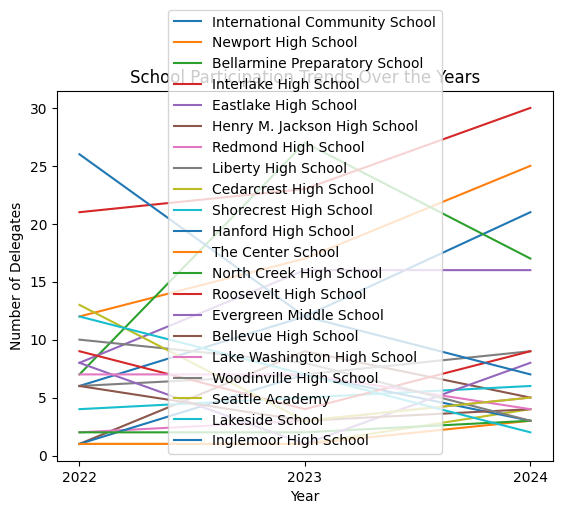

In [9]:
import matplotlib.pyplot as plt

# Plot participation trends for each school
for index, row in df_merged.iterrows():
    plt.plot([1, 2, 3], [row['Num. of Dels 2022'], row['Num. of Dels 2023'], row['Num. of Dels 2024']], label=row['School'])

plt.title('School Participation Trends Over the Years')
plt.xlabel('Year')
# plt.figure(figsize=(15, 10))
plt.ylabel('Number of Delegates')
plt.xticks([1, 2, 3], ['2022', '2023', '2024'])
plt.legend()
plt.show()

In [10]:
df_merged

,School,Num. of Dels 2022,Num. of Dels 2023,Num. of Dels 2024,change_year1_to_year2,change_year2_to_year3,percent_change_year1_to_year2,percent_change_year2_to_year3,total_change
15,International Community School,6,12,21,6,9,100.000000,75.000000,15
19,Newport High School,12,17,25,5,8,41.666667,47.058824,13
3,Bellarmine Preparatory School,7,27,17,20,-10,285.714286,-37.037037,10
1,Interlake High School,21,23,30,2,7,9.523810,30.434783,9
2,Eastlake High School,8,16,16,8,0,100.000000,0.000000,8
8,Henry M. Jackson High School,1,9,5,8,-4,800.000000,-44.444444,4
10,Redmond High School,2,3,5,1,2,50.000000,66.666667,3
12,Liberty High School,6,7,9,1,2,16.666667,28.571429,3
20,Cedarcrest High School,1,1,4,0,3,0.000000,300.000000,3
11,Shorecrest High School,4,5,6,1,1,25.000000,20.000000,2


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set a style for better-looking plots
sns.set_theme(style="whitegrid")


In [23]:
df_merged

,School,Num. of Dels 2022,Num. of Dels 2023,Num. of Dels 2024,change_year1_to_year2,change_year2_to_year3,percent_change_year1_to_year2,percent_change_year2_to_year3,total_change
15,International Community School,6,12,21,6,9,100.000000,75.000000,15
19,Newport High School,12,17,25,5,8,41.666667,47.058824,13
3,Bellarmine Preparatory School,7,27,17,20,-10,285.714286,-37.037037,10
1,Interlake High School,21,23,30,2,7,9.523810,30.434783,9
2,Eastlake High School,8,16,16,8,0,100.000000,0.000000,8
8,Henry M. Jackson High School,1,9,5,8,-4,800.000000,-44.444444,4
10,Redmond High School,2,3,5,1,2,50.000000,66.666667,3
12,Liberty High School,6,7,9,1,2,16.666667,28.571429,3
20,Cedarcrest High School,1,1,4,0,3,0.000000,300.000000,3
11,Shorecrest High School,4,5,6,1,1,25.000000,20.000000,2


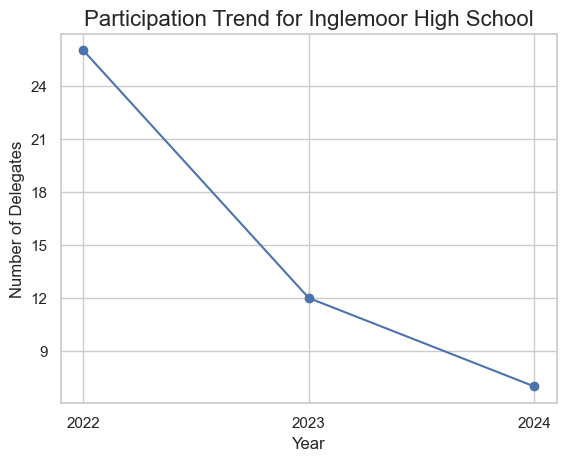

In [31]:
i=20

# Extract the number of delegates for each year
years = ['2022', '2023', '2024']
num_delegates = [df_merged.iloc[i]['Num. of Dels 2022'], df_merged.iloc[i]['Num. of Dels 2023'], df_merged.iloc[i]['Num. of Dels 2024']]

# Create a line plot for the number of delegates over the years
# plt.figure(figsize=(10, 6))
plt.plot(years, num_delegates, marker='o', linestyle='-', color='b')

# Add titles and labels
plt.title(f"Participation Trend for {df_merged.iloc[i,0]}", fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Delegates', fontsize=12)

import numpy as np
from matplotlib.ticker import MaxNLocator
ax = plt.gca()  # Get the current axes
ax.yaxis.set_major_locator(MaxNLocator(integer=True))  # Ensure only integer values on the y-axis

# Show the plot
plt.grid(True)
plt.show()

